In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lets import and visualize our data

In [2]:
header = ['x1', 'x2', 'y']
dataset = pd.read_csv(r"/Users/andrei/Desktop/KNUProjects/Masters/Neironki/master_labs/data/data3.csv", sep=' '
                       , names=header)
X, y = dataset.iloc[:,:2], dataset['y']
print(X.shape)
print(y.shape)

(360, 2)
(360,)


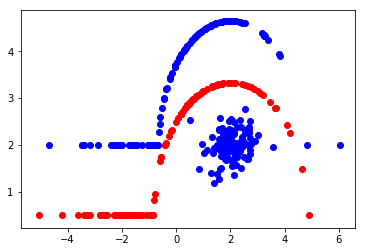

In [3]:
plt.scatter(dataset['x1'][dataset['y'] == 1], dataset['x2'][dataset['y'] == 1], c='blue')
plt.scatter(dataset['x1'][dataset['y'] == 0], dataset['x2'][dataset['y'] == 0], c='red')

Lets transfor our lables into dummy variables

In [4]:
# Get dummy variable 
y = pd.get_dummies(y).values

y[:2]

array([[0, 1],
       [0, 1]], dtype=uint8)

Lets define constants and initialize parametrs for the future network

In [22]:
# Initialize variables
learning_rate = 0.01
iterations = 50000
N = y.size

# number of input features
input_size = 2

# number of hidden layers neurons
hidden_size = 500

# number of neurons at the output layer
output_size = 2

results = pd.DataFrame(columns=["mse", "accuracy"])

In [23]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

Lets define hellper functions and build forward propagation, metrics calculation, backward propagation and parametr updates

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [25]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y)
    acc = accuracy(A2, y)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

Lets visualize our optimization process

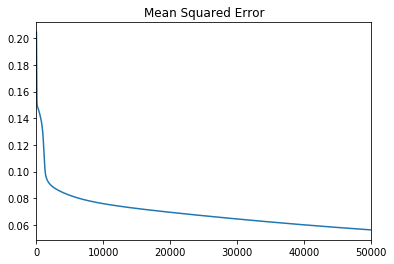

In [26]:
results.mse.plot(title="Mean Squared Error")

Lets use our network to predict labels

In [27]:
# feedforward
Z1 = np.dot(X, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y)
print("Accuracy: {}".format(acc))

Accuracy: 0.8638888888888889


Lets visualize network prediction

In [28]:
z = []
for i in range(A2.shape[0]): 
    if A2[i][0] > A2[i][1]:
        z.append(0)
    else:
        z.append(1)
        
dataset['z'] = z

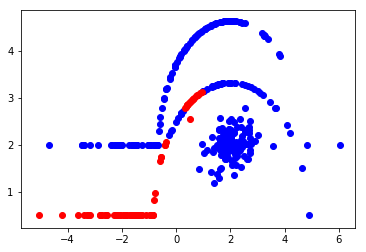

In [29]:
plt.scatter(dataset['x1'][dataset['z'] == 1], dataset['x2'][dataset['z'] == 1], c='blue')
plt.scatter(dataset['x1'][dataset['z'] == 0], dataset['x2'][dataset['z'] == 0], c='red')

Conclusion:
    
Our simple neural network with one hidden layer havent shown best results. A lot of the misclassifications in the "blue" label.
To increase classification accuracy more hidden layers should be added.
